In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df=pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [10]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [16]:
df['ENGINESIZE'].head(5)

0    2.0
1    2.4
2    1.5
3    3.5
4    3.5
Name: ENGINESIZE, dtype: float64

In [21]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


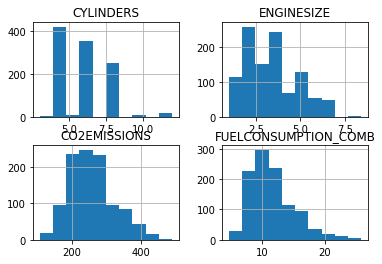

In [29]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

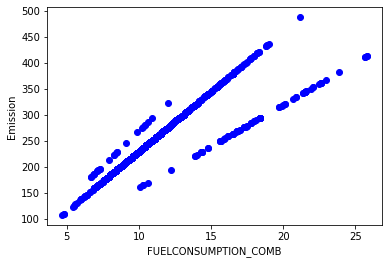

In [31]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

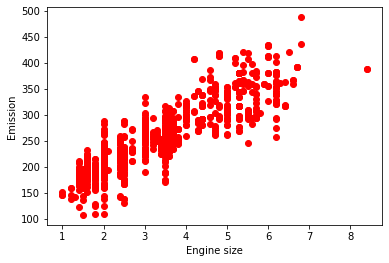

In [34]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

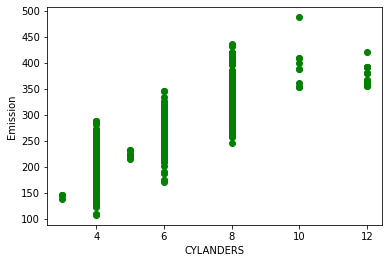

In [41]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("CYLANDERS")
plt.ylabel("Emission")
plt.show()

# پس متوجه میشویم که ارتباط خروج دی اکسید کربن و حجم موتور ترکیب خوبی برای رگرسیون خطی هستند
#پس می رویم سراغ برازش یک خط برای نشان دادن ارتباط این دو مورد

In [57]:
#split data to 2 parts (traind and test) using mask(msk):
msk=np.random.rand(len(cdf)) <0.8
train= cdf[msk]
test= cdf[~msk]

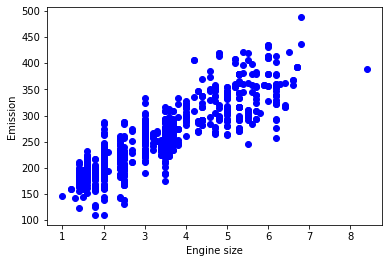

In [47]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

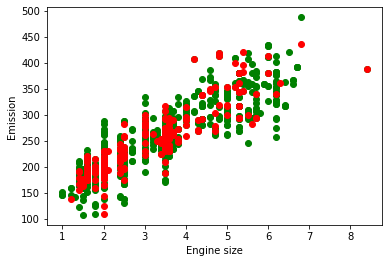

In [58]:
#کشیدن همزمان ۲ منحنی پرواکندگی

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='green')
ax1.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='red')

plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [60]:
#قراره بر اساس نقاط سبز الگوریتم را اموزش دهیم(یک خط بر ان برازش دهیم). و بر اساس نقاط قرمز چک کنیم که چقدر اموزش صحیح بوده است

In [75]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x,train_y)

print('regression coefficient= ', regr.coef_)
print('intercept= ', regr.intercept_)

regression coefficient=  [[38.61516865]]
intercept=  [126.71135074]


Text(0, 0.5, 'Emission')

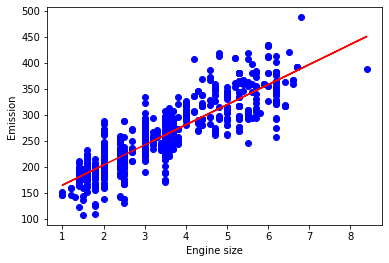

In [78]:
#ضرایب شیب خط و عر از مبدا را بدست اوردیم. حالا ان رارسم میکنیم

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0] *train_x + regr.intercept_[0], '-r')

plt.xlabel("Engine size")
plt.ylabel("Emission")


In [83]:
#حالا میخواهیم مدل بدست امده را ارزیابی (تست) کنیم

from sklearn.metrics import r2_score

test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])

test_y_=regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.65
Residual sum of squares (MSE): 986.80
R2-score: 0.76


In [84]:
#بالاتر از 0.75 بد نیست و میشه مورد استفاده قرار بگیره. به 0.9 برسه عالیه